# Байесовские оценки. Задача 2


__Ильичёв А.С., 693__

In [1]:
import numpy as np
import scipy.stats as sts
from matplotlib import pyplot as plt
%matplotlib inline

Рассматривается схема испытаний Бернулли с вероятностью успеха $p$.

#### 1. Построим несколько графиков сопряженного априорного распределения для разных параметров и объясним, как значения параметров соотносятся с априорными знаниями о монете.

Сопряженным распределением для $Bern(p)$ является $Beta(\alpha, \beta)$.

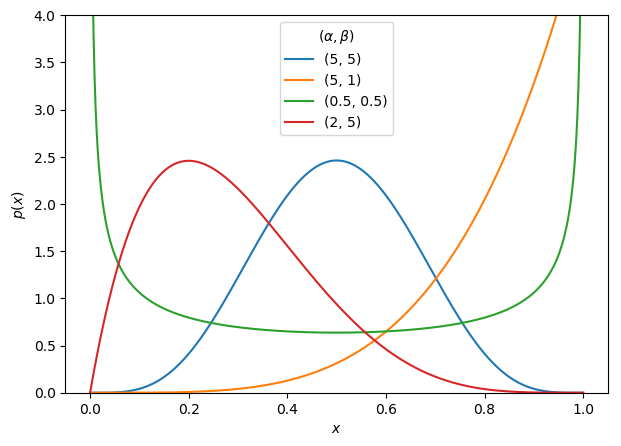

In [2]:
b_pars = [(5, 5), (5, 1), (0.5, 0.5), (2, 5)]
x = np.linspace(0, 1, 1000)
plt.figure(figsize=(7, 5), dpi=100)
for p in b_pars:
    plt.plot(x, sts.beta(p[0], p[1]).pdf(x), label=p)
    plt.legend(title=r'$(\alpha, \beta)$')
plt.ylim(0, 4)
plt.xlabel(r'$x$')
plt.ylabel(r'$p(x)$')
plt.show()
    

Будем обозначать стороны монеты 0 и 1 в честь соответствующих значений случайной величины из распределения Бернулли ($p$ - вероятность выпадения 1). 

При параметрах (5, 5) монета, скорее всего, честная (значения $p$ в окрестности 0.5 наиболее вероятны).

При параметрах (5, 1) монета с большой вероятностью нечестная в пользу 1 (значения $p$ сильно смещены в окрестность 1).

При параметрах (0.5, 0.5) монета скорее всего, нечестная (значения $p$ в окрестности 0.5 наименее вероятны).

При параметрах (2, 5) монета скорее всего, нечестная в пользу 0 (значения $p$ смещены в окрестность 0).



#### 2. Проведем по 20 "бросков" для разных монет и найдем байесовские оценки $p$ при различных параметрах априорного распределения. Найдем также оценки максимального правдоподобия. Построим графики абсолютных величин отклонений в зависимости от $n$.

Параметры апостериорного распределения $(\sum_1^n X_i + \alpha, \,n - \sum_1^n X_i + \beta)$, а значит, байесовская оценка $p^* = \frac{\sum_1^n X_i + \alpha}{\alpha + n + \beta}$.

Оценка максимального правдоподобия $p_{mle}^* = \overline X$.

In [3]:
ps = [0.1, 0.2,  0.5, 0.85]

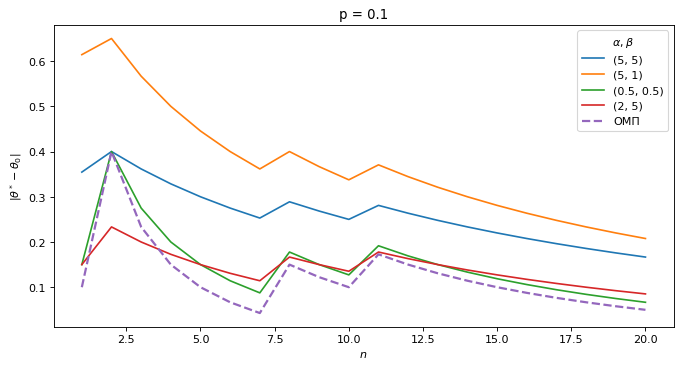

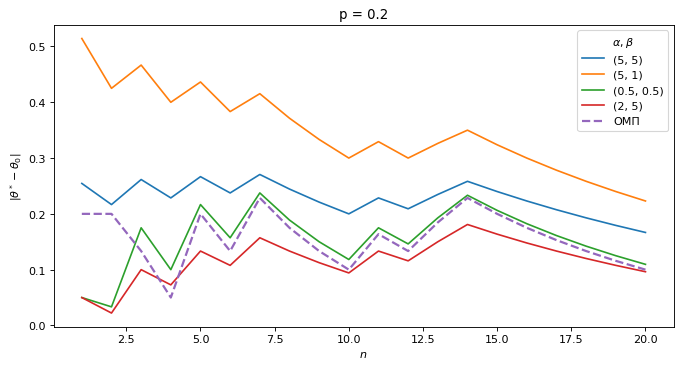

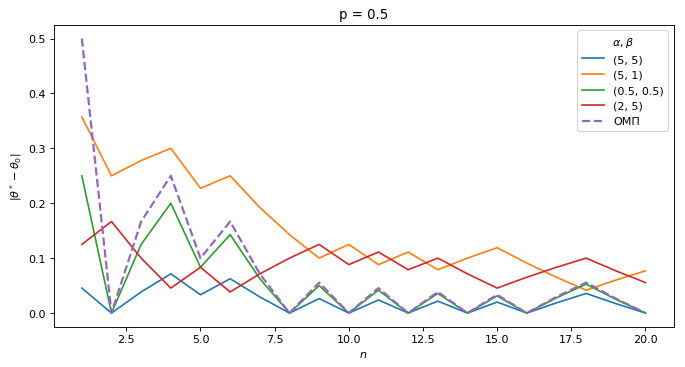

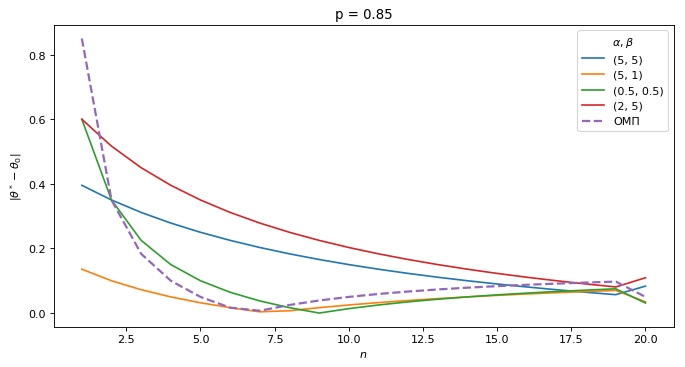

In [4]:
N = 20
ns = np.arange(1, N + 1)
for p in ps:
    plt.figure(figsize=(10, 5), dpi=80)
    sample = sts.bernoulli(p).rvs(N)
    
    for bp in b_pars:
        est = np.array([(sample[:n].sum() + bp[0]) / 
                      (bp[0] + bp[1] + n) for n in ns])
        plt.plot(ns, np.abs(est - p), label=bp)

    mle = np.array([sample[:n].mean() for n in ns])
    plt.plot(ns, np.abs(mle - p),'--', linewidth=2, label='ОМП')
    
    plt.legend(title=r'$\alpha, \beta$')
    plt.title("p = "+ str(p))
    plt.xlabel(r'$n$')
    plt.ylabel(r'$|\theta^* - \theta_0|$')

    plt.show()
    

#### 3. Вывод. 

В целом видна тенденция, что байесовские оценки, корректно учитывающие априорные знания, проявляют себя лучше, чем с неподходящими параметрами (и часто лучше ОМП). Оценка с параметрами (0.5, 0.5) (зеленая) неплохо проявляет себя на любых "нечестных" монетах, а симметричное и сильно смещенное априорное распределение хорошо подойдут, только если правильно предсказать закономерность в данных (то есть если параметр выборки близок к 0.5 или 1 соответственно).

Мы еще раз подтвердили важность правильного подбора параметров в байесовском подходе.